<a href="https://colab.research.google.com/github/snehaella5/my-first-repo/blob/main/stockMarketPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance quandl alpha_vantage


In [ ]:
import yfinance as yf
import quandl
from alpha_vantage.timeseries import TimeSeries



In [ ]:
data = yf.download('AAPL', start= '2010-01-01', end='2022-02-26')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.head())

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447412  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458560  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355827  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344077  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386254  7.570714  7.571429  7.466429  7.510714  447610800


In [ ]:
print(data.tail())

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-02-18  164.813354  167.300003  170.539993  166.190002  169.820007   
2022-02-22  161.877701  164.320007  166.690002  162.149994  164.979996   
2022-02-23  157.690872  160.070007  166.149994  159.750000  165.539993   
2022-02-24  160.321152  162.740005  162.850006  152.000000  152.580002   
2022-02-25  162.399826  164.850006  165.119995  160.869995  163.839996   

Price          Volume  
Ticker           AAPL  
Date                   
2022-02-18   82772700  
2022-02-22   91162800  
2022-02-23   90009200  
2022-02-24  141147500  
2022-02-25   91974200  


In [ ]:
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# data loading
stock_data = yf.download('AAPL', start='2010-01-01', end='2022-02-26')

# Pre proprocessing the data
X = stock_data[['Open', 'High', 'Low']]
y = stock_data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the  model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2}")

[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 0.23
R-squared: 0.9998723678859684


In [ ]:
# Feature Engineering

stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()



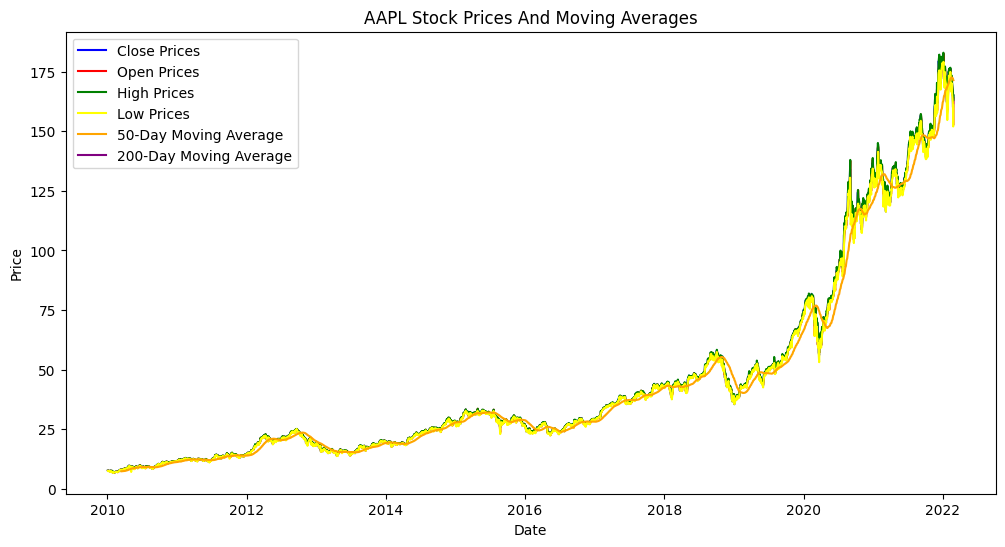

In [ ]:
import matplotlib.pyplot as plt

# plotting historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Prices', color='blue')
plt.plot(stock_data['Open'], label='Open Prices', color='red')
plt.plot(stock_data['High'], label='High Prices', color='green')
plt.plot(stock_data['Low'], label='Low Prices', color='yellow')
plt.plot(stock_data['Moving_Average'], label='50-Day Moving Average', color='orange')
plt.plot(stock_data['MA200'], label='200-Day Moving Average', color='purple')
plt.title('AAPL Stock Prices And Moving Averages')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Model Comparison : compare different machine learning models to find the best one for current prediction task

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert y_train to a 1D array using .values.ravel()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Mean Squared Error: {rf_mse:.2f}")
print(f"Random Forest R-squared: {rf_r2:.2f}")




Random Forest Mean Squared Error: 0.43
Random Forest R-squared: 1.00


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train.values.ravel())  # Flatten y_train using ravel()

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")




Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Best Score: 0.9997729139432836


In [ ]:
# Model Evaluation

from sklearn.model_selection import cross_val_score

cross_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Cross-Validation Scores: {cross_scores}")
print(f"Mean Cross-Validation Score: {cross_scores.mean()}")

Cross-Validation Scores: [0.99945976 0.99908653 0.99778543 0.99803827 0.99930141]
Mean Cross-Validation Score: 0.9987342810363717
